In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "calabria"

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,18,Calabria,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,18,Calabria,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,18,Calabria,0,0,0,0,0,0,0,...,0.0,11.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,18,Calabria,0,0,0,1,1,1,1,...,0.0,7.0,0.0,1.0,0.00,0.00,14.29,0.00,0.00,0.00
4,2020-02-29T17:00:00,18,Calabria,0,0,0,1,1,0,0,...,0.0,6.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,2021-08-20T17:00:00,18,Calabria,124,9,133,3507,3640,77,282,...,3.0,2236.0,2087.0,80.0,6.77,3.65,12.61,13.51,-18.18,2.16
543,2021-08-21T17:00:00,18,Calabria,122,12,134,3704,3838,198,290,...,2.0,4990.0,4026.0,197.0,8.96,3.49,5.81,7.20,33.33,5.44
544,2021-08-22T17:00:00,18,Calabria,118,12,130,3761,3891,53,213,...,0.0,1859.0,1479.0,57.0,9.23,3.34,11.46,14.40,0.00,1.38
545,2021-08-23T17:00:00,18,Calabria,123,8,131,3925,4056,165,257,...,3.0,2273.0,1708.0,164.0,6.11,3.23,11.31,15.05,-33.33,4.24


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 8, 24, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 234
Nuovi tamponi: 2588.0
Percentuale nuovi positivi/nuovi tamponi: 9.0 %
Nuovi guariti: 161.0
Nuovi deceduti: 2.0
Variazione positivi ricoverati con sintomi: 2.0
Variazione positivi in terapia intensiva: 2.0
Variazione positivi in isolamento dimiciliare: 67.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 8, 24, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-06-25T17:00:00,18,Calabria,72,7,79,5853,5932,-87,39,...,1.0,2482.0,2146.0,-79.0,8.86,1.33,1.57,1.82,-22.22,-1.45
1,2021-06-26T17:00:00,18,Calabria,65,7,72,5587,5659,-273,37,...,0.0,2042.0,1824.0,-266.0,9.72,1.27,1.81,2.03,0.00,-4.60
2,2021-06-27T17:00:00,18,Calabria,64,6,70,5439,5509,-150,36,...,0.0,1672.0,1296.0,-148.0,8.57,1.27,2.15,2.78,-14.29,-2.65
3,2021-06-28T17:00:00,18,Calabria,66,6,72,5373,5445,-64,7,...,0.0,1021.0,966.0,-66.0,8.33,1.32,0.69,0.72,0.00,-1.16
4,2021-06-29T17:00:00,18,Calabria,68,6,74,5213,5287,-158,25,...,0.0,2296.0,2000.0,-160.0,8.11,1.40,1.09,1.25,0.00,-2.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-08-20T17:00:00,18,Calabria,124,9,133,3507,3640,77,282,...,3.0,2236.0,2087.0,80.0,6.77,3.65,12.61,13.51,-18.18,2.16
57,2021-08-21T17:00:00,18,Calabria,122,12,134,3704,3838,198,290,...,2.0,4990.0,4026.0,197.0,8.96,3.49,5.81,7.20,33.33,5.44
58,2021-08-22T17:00:00,18,Calabria,118,12,130,3761,3891,53,213,...,0.0,1859.0,1479.0,57.0,9.23,3.34,11.46,14.40,0.00,1.38
59,2021-08-23T17:00:00,18,Calabria,123,8,131,3925,4056,165,257,...,3.0,2273.0,1708.0,164.0,6.11,3.23,11.31,15.05,-33.33,4.24


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

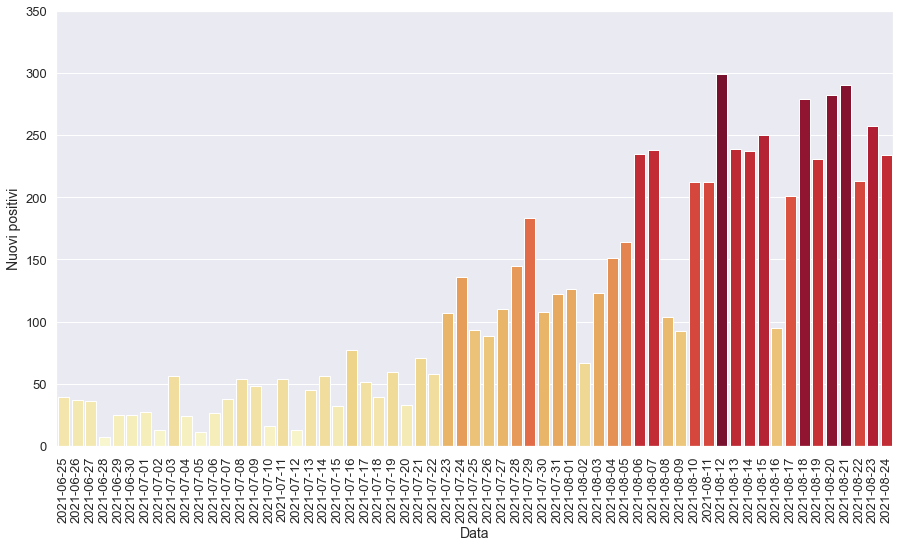

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

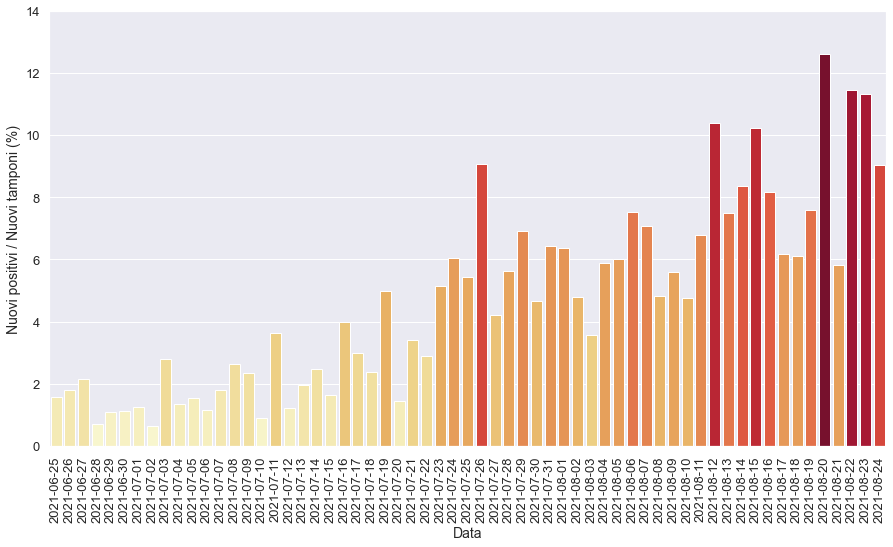

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

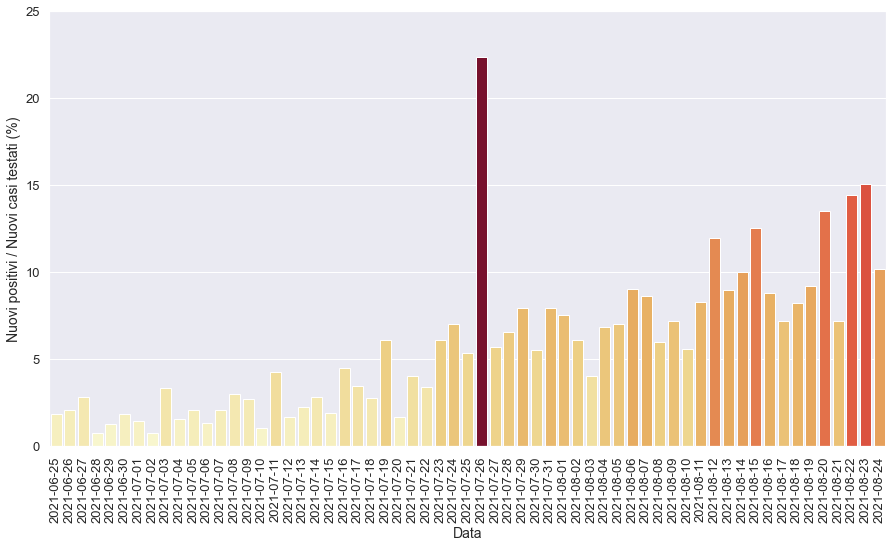

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

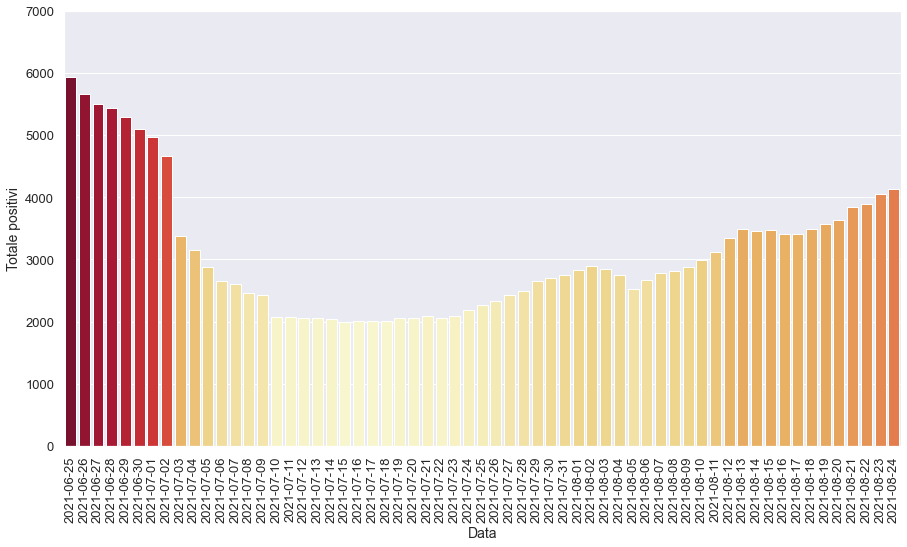

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

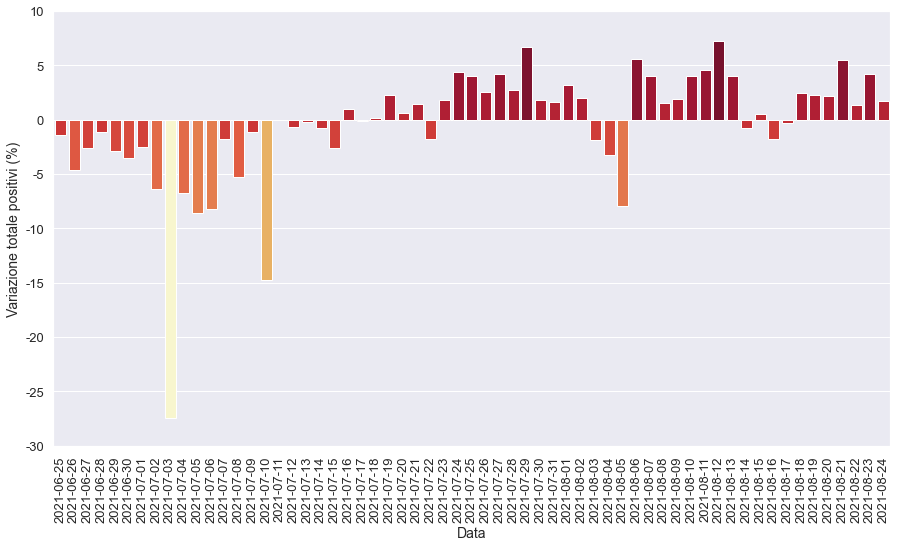

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

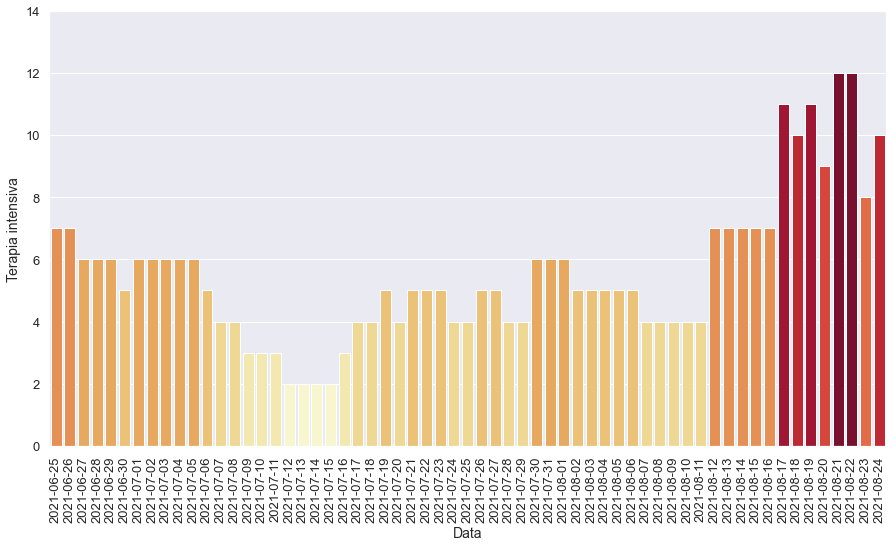

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

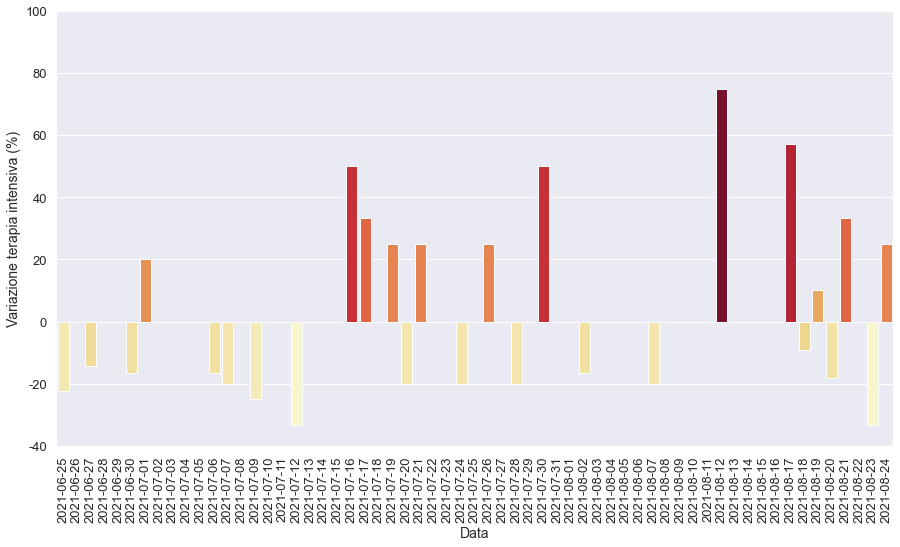

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

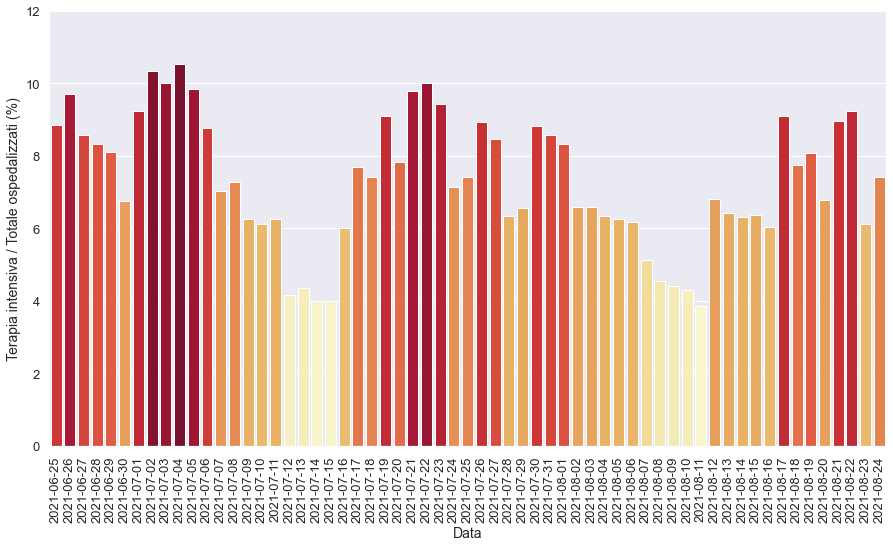

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

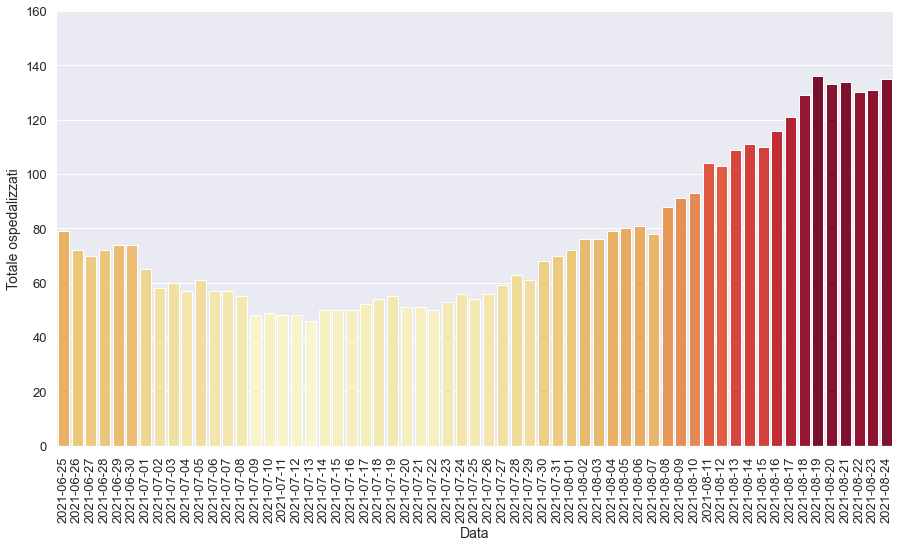

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

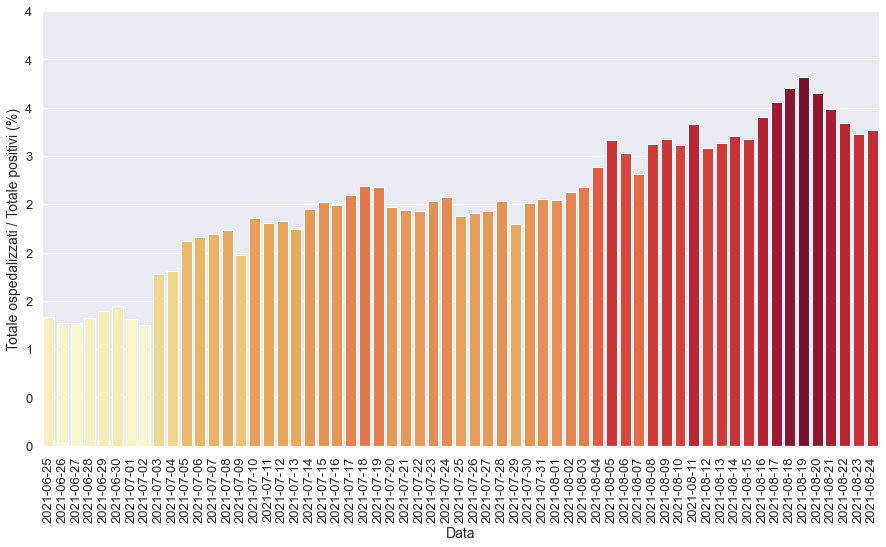

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

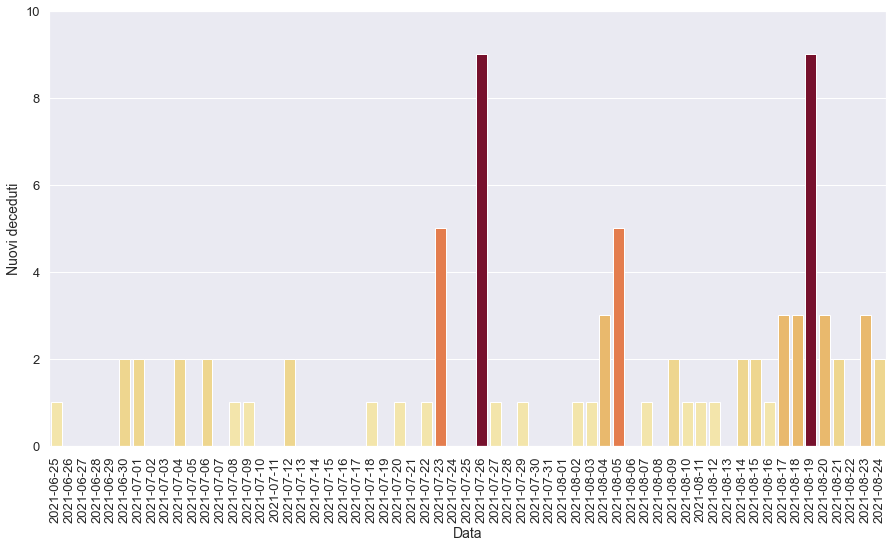

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

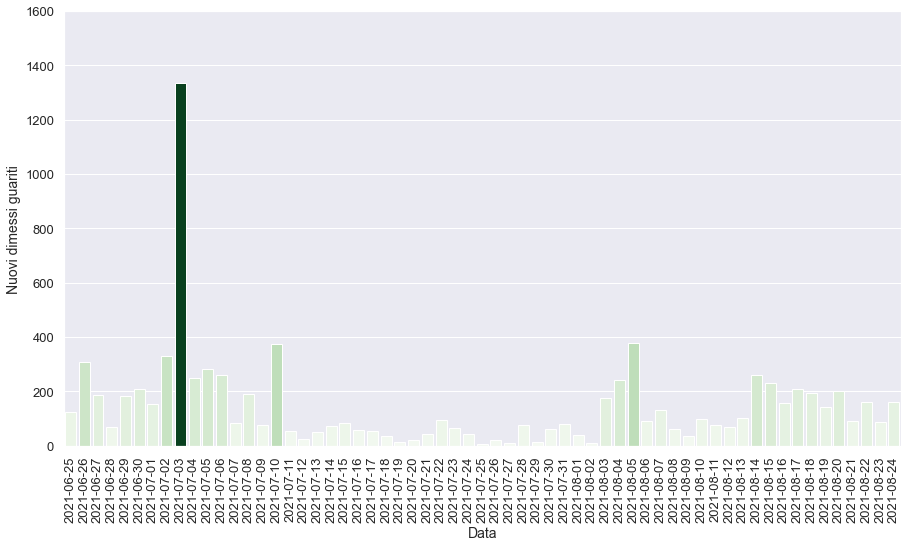

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-07-25T17:00:00,18,Calabria,50,4,54,2216,2270,87,93,...,0.0,1705.0,1736.0,89.0,7.41,2.38,5.45,5.36,0.00,3.99
1,2021-07-26T17:00:00,18,Calabria,51,5,56,2271,2327,57,88,...,9.0,969.0,394.0,55.0,8.93,2.41,9.08,22.34,25.00,2.51
2,2021-07-27T17:00:00,18,Calabria,54,5,59,2365,2424,97,110,...,1.0,2621.0,1940.0,94.0,8.47,2.43,4.20,5.67,0.00,4.17
3,2021-07-28T17:00:00,18,Calabria,59,4,63,2428,2491,67,145,...,0.0,2579.0,2208.0,63.0,6.35,2.53,5.62,6.57,-20.00,2.76
4,2021-07-29T17:00:00,18,Calabria,57,4,61,2597,2658,167,183,...,1.0,2652.0,2309.0,169.0,6.56,2.29,6.90,7.93,0.00,6.70
5,2021-07-30T17:00:00,18,Calabria,62,6,68,2638,2706,48,108,...,0.0,2318.0,1955.0,41.0,8.82,2.51,4.66,5.52,50.00,1.81
6,2021-07-31T17:00:00,18,Calabria,64,6,70,2679,2749,43,122,...,0.0,1894.0,1537.0,41.0,8.57,2.55,6.44,7.94,0.00,1.59
7,2021-08-01T17:00:00,18,Calabria,66,6,72,2765,2837,88,126,...,0.0,1980.0,1674.0,86.0,8.33,2.54,6.36,7.53,0.00,3.20
8,2021-08-02T17:00:00,18,Calabria,71,5,76,2817,2893,56,67,...,1.0,1401.0,1096.0,52.0,6.58,2.63,4.78,6.11,-16.67,1.97
9,2021-08-03T17:00:00,18,Calabria,71,5,76,2764,2840,-53,123,...,1.0,3451.0,3065.0,-53.0,6.58,2.68,3.56,4.01,0.00,-1.83


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

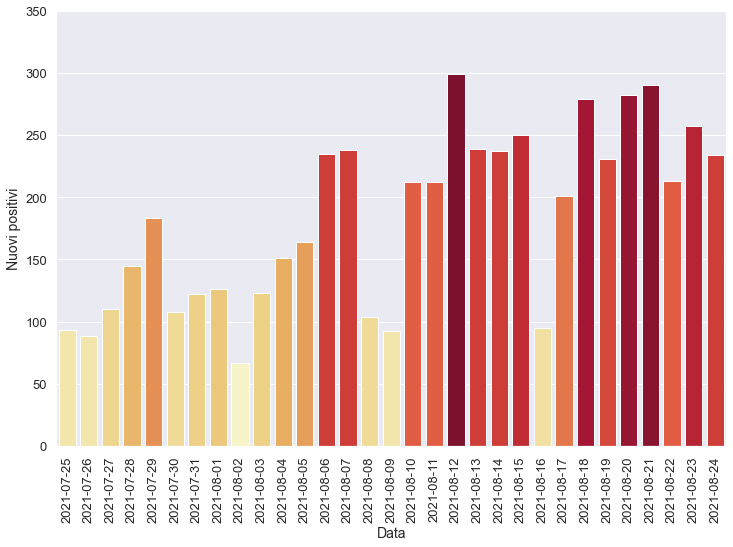

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

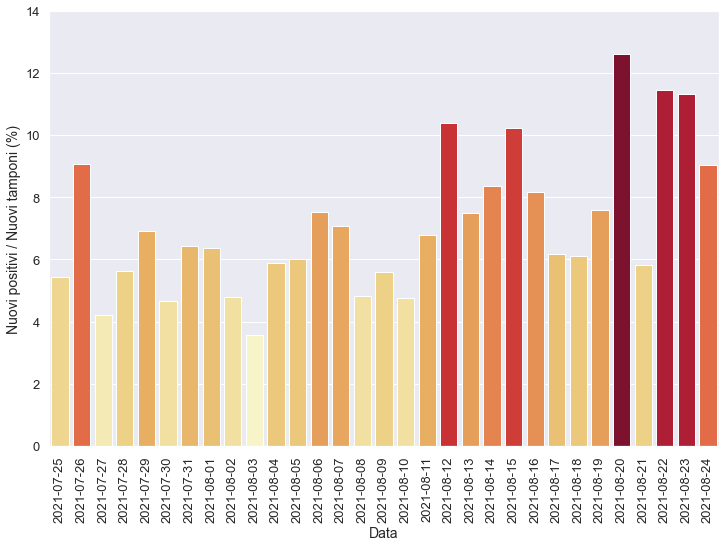

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

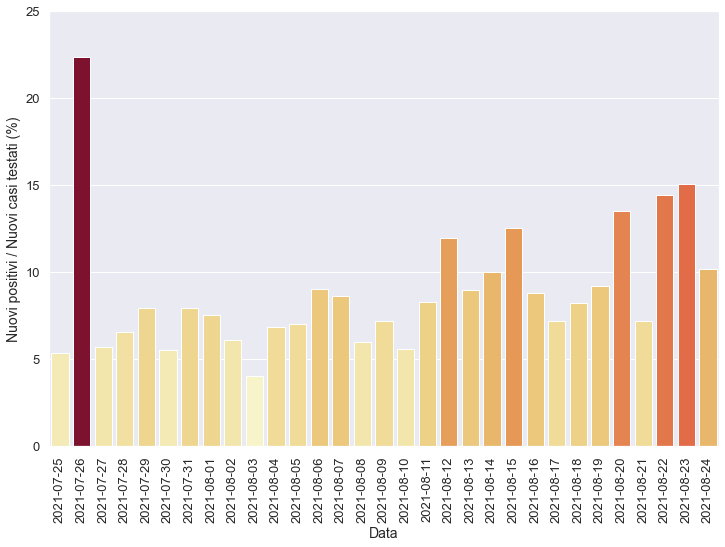

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

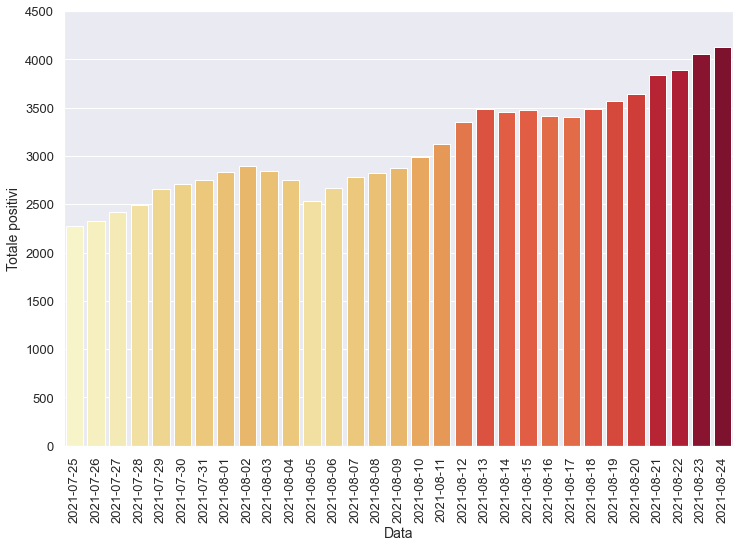

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

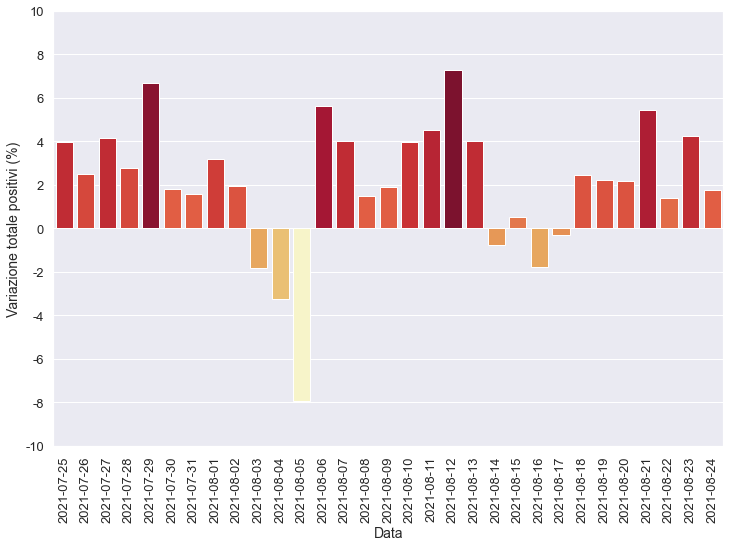

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

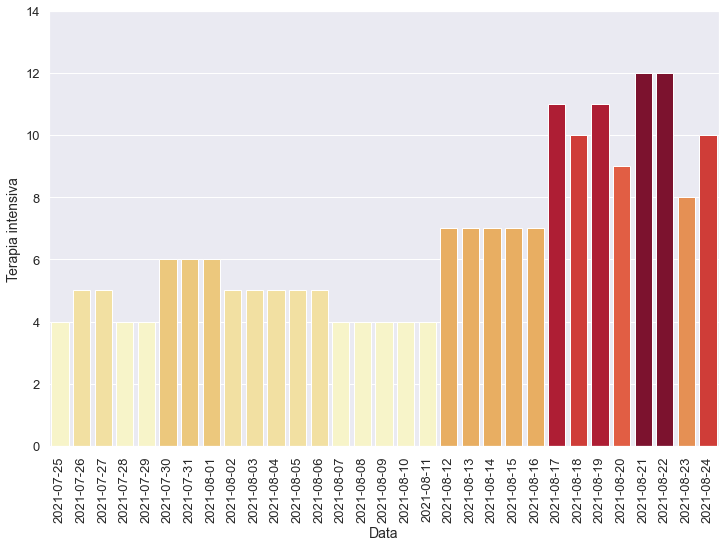

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

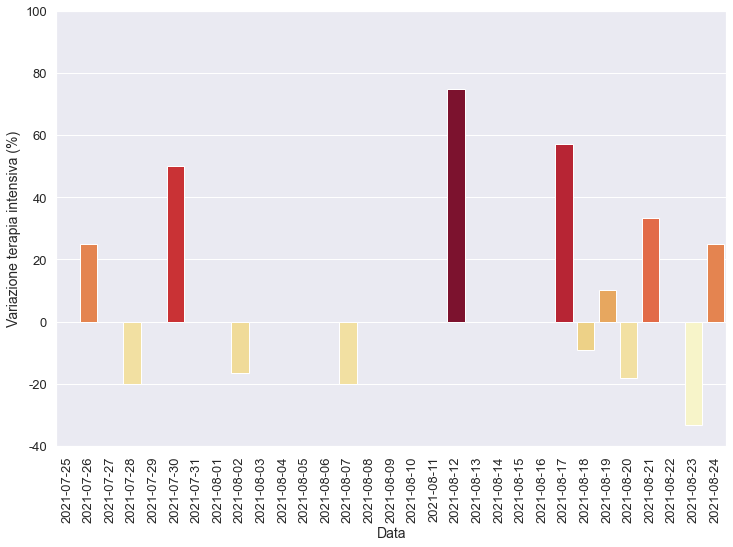

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

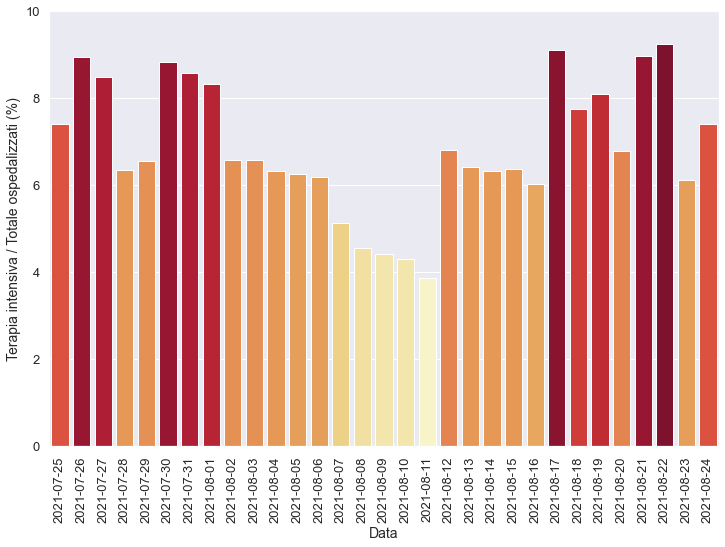

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

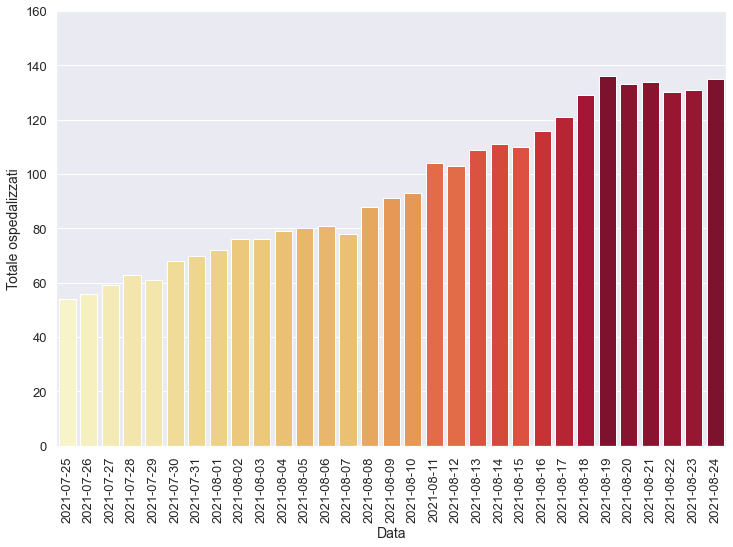

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

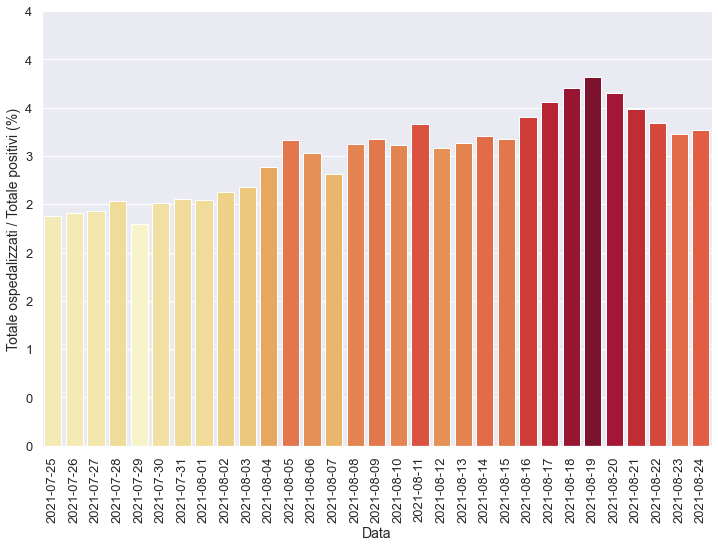

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

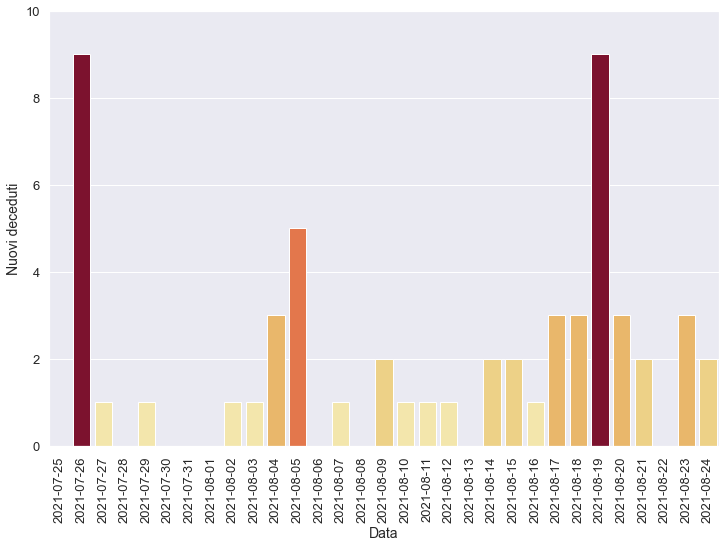

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

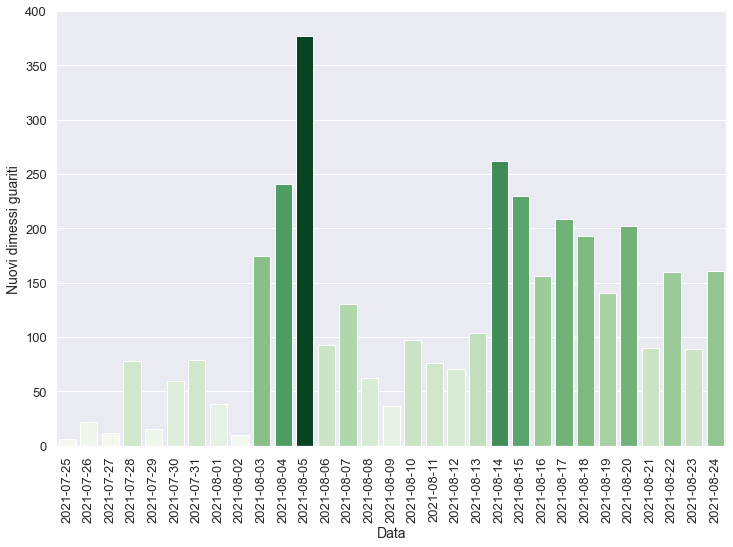

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-08-17T17:00:00,18,Calabria,110,11,121,3281,3402,-11,201,...,3.0,3254.0,2808.0,-16.0,9.09,3.56,6.18,7.16,57.14,-0.32
1,2021-08-18T17:00:00,18,Calabria,119,10,129,3356,3485,83,279,...,3.0,4571.0,3396.0,75.0,7.75,3.70,6.10,8.22,-9.09,2.44
2,2021-08-19T17:00:00,18,Calabria,125,11,136,3427,3563,78,231,...,9.0,3047.0,2514.0,71.0,8.09,3.82,7.58,9.19,10.00,2.24
3,2021-08-20T17:00:00,18,Calabria,124,9,133,3507,3640,77,282,...,3.0,2236.0,2087.0,80.0,6.77,3.65,12.61,13.51,-18.18,2.16
4,2021-08-21T17:00:00,18,Calabria,122,12,134,3704,3838,198,290,...,2.0,4990.0,4026.0,197.0,8.96,3.49,5.81,7.20,33.33,5.44
5,2021-08-22T17:00:00,18,Calabria,118,12,130,3761,3891,53,213,...,0.0,1859.0,1479.0,57.0,9.23,3.34,11.46,14.40,0.00,1.38
6,2021-08-23T17:00:00,18,Calabria,123,8,131,3925,4056,165,257,...,3.0,2273.0,1708.0,164.0,6.11,3.23,11.31,15.05,-33.33,4.24
7,2021-08-24T17:00:00,18,Calabria,125,10,135,3992,4127,71,234,...,2.0,2588.0,2299.0,67.0,7.41,3.27,9.04,10.18,25.00,1.75


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

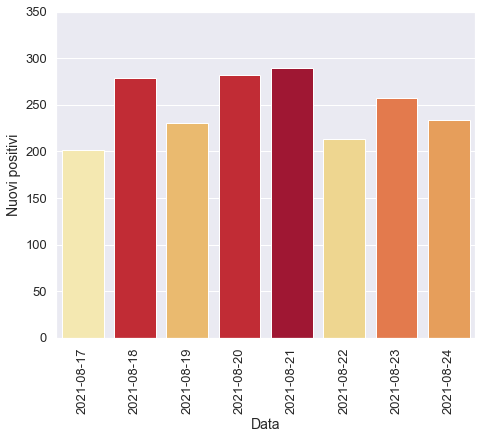

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

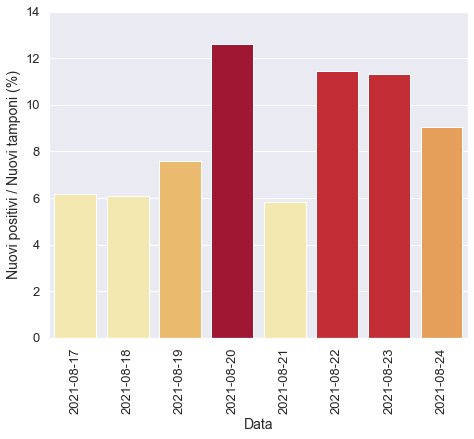

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

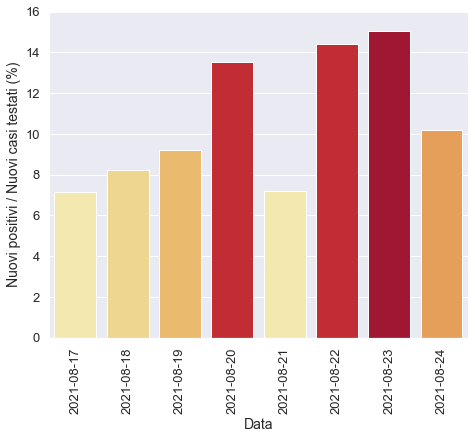

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

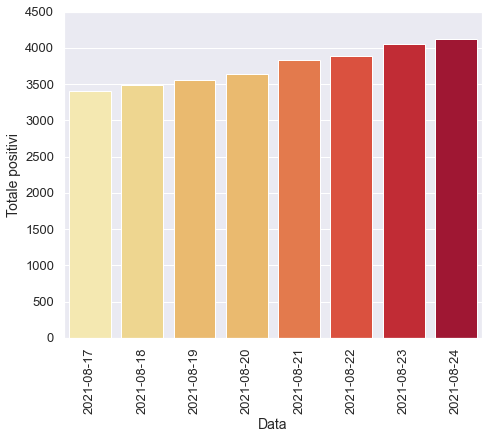

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

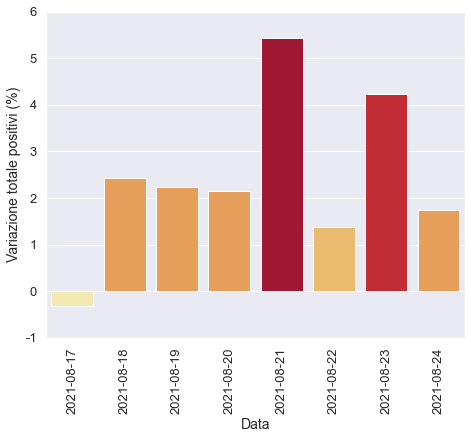

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

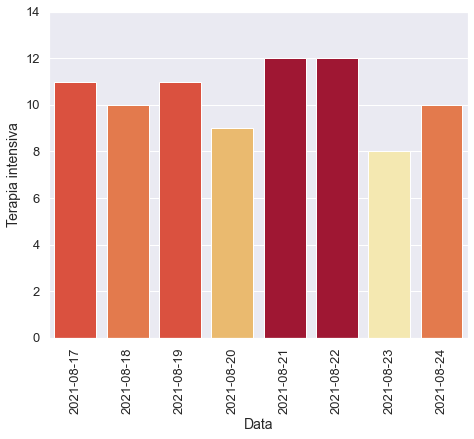

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

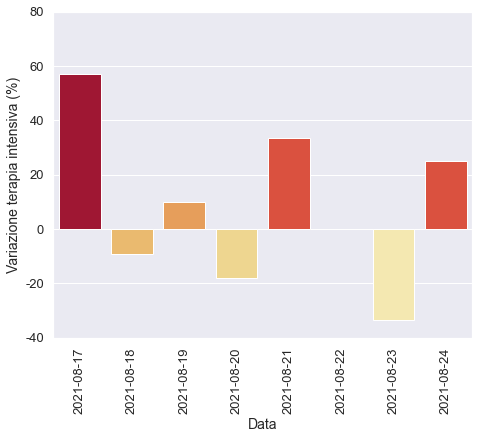

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

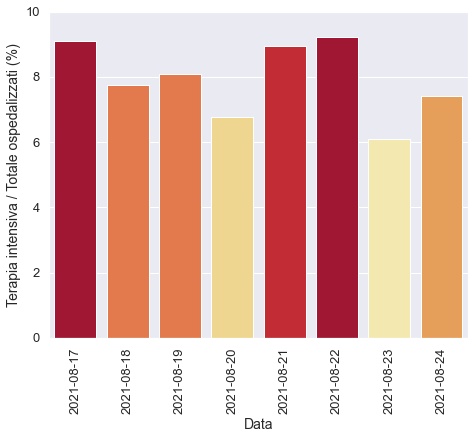

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

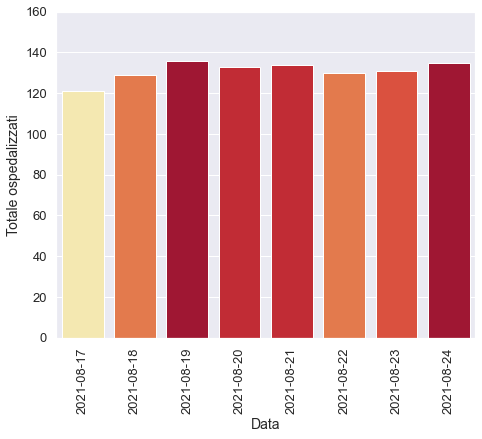

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

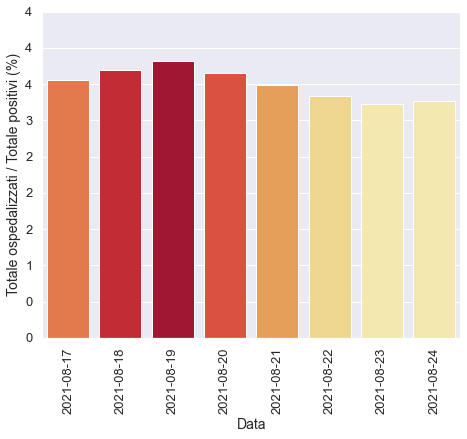

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

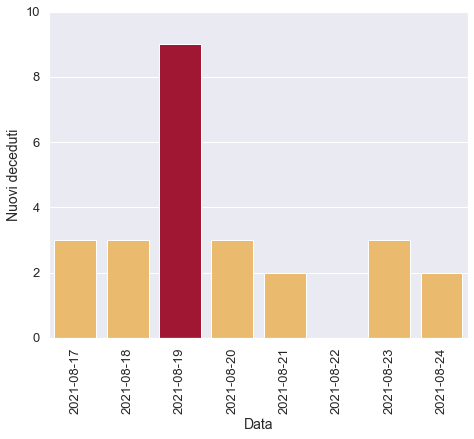

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

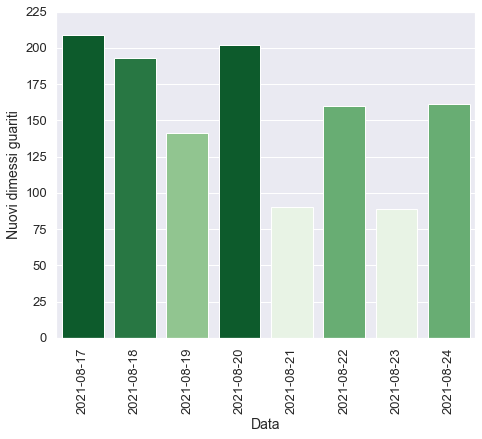

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)